<a href="https://colab.research.google.com/github/Mohammad-H-Zahrawi/artificial-intelligence_training_courses/blob/master/YOLO%20/YOLO_proj1_potholes/YOLO_potholes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the Required Libraries

In [ ]:
import os
import glob
from IPython.display import Image, display
from IPython import display
display.clear_output()

In [ ]:
#check GPU
!nvidia-smi

Thu Jan  9 21:11:23 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
#Installing Ultralytics using Pip Install
!pip install ultralytics==8.0.0

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.5/112.6 GB disk)


In [ ]:
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!mkdir {HOME}/datasets

In [ ]:
!pwd

/content


In [ ]:
%cd {HOME}/datasets
!pwd

/content/datasets
/content/datasets


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="w4K80EKY5nemBt4RQkEY")
project = rf.workspace("yoloprojects-3zzqw").project("potholes-3hyea")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Potholes--1 in yolov8:: 100%|██████████| 1124/1124 [00:00<00:00, 9093.89it/s]


## Train the model

In [ ]:
#Train the YOLOv8 Model on the Custom Dataset
%cd {HOME}

/content


In [ ]:
!pwd

/content


In [ ]:
%env HYDRA_FULL_ERROR=1

env: HYDRA_FULL_ERROR=1


In [ ]:
%cd /content/datasets/Potholes

/content/datasets/Potholes


In [ ]:
!ls

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/datasets/Potholes/data.yaml epochs=70 imgsz=320

100% 49.7M/49.7M [00:00<00:00, 326MB/s]

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:341: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load

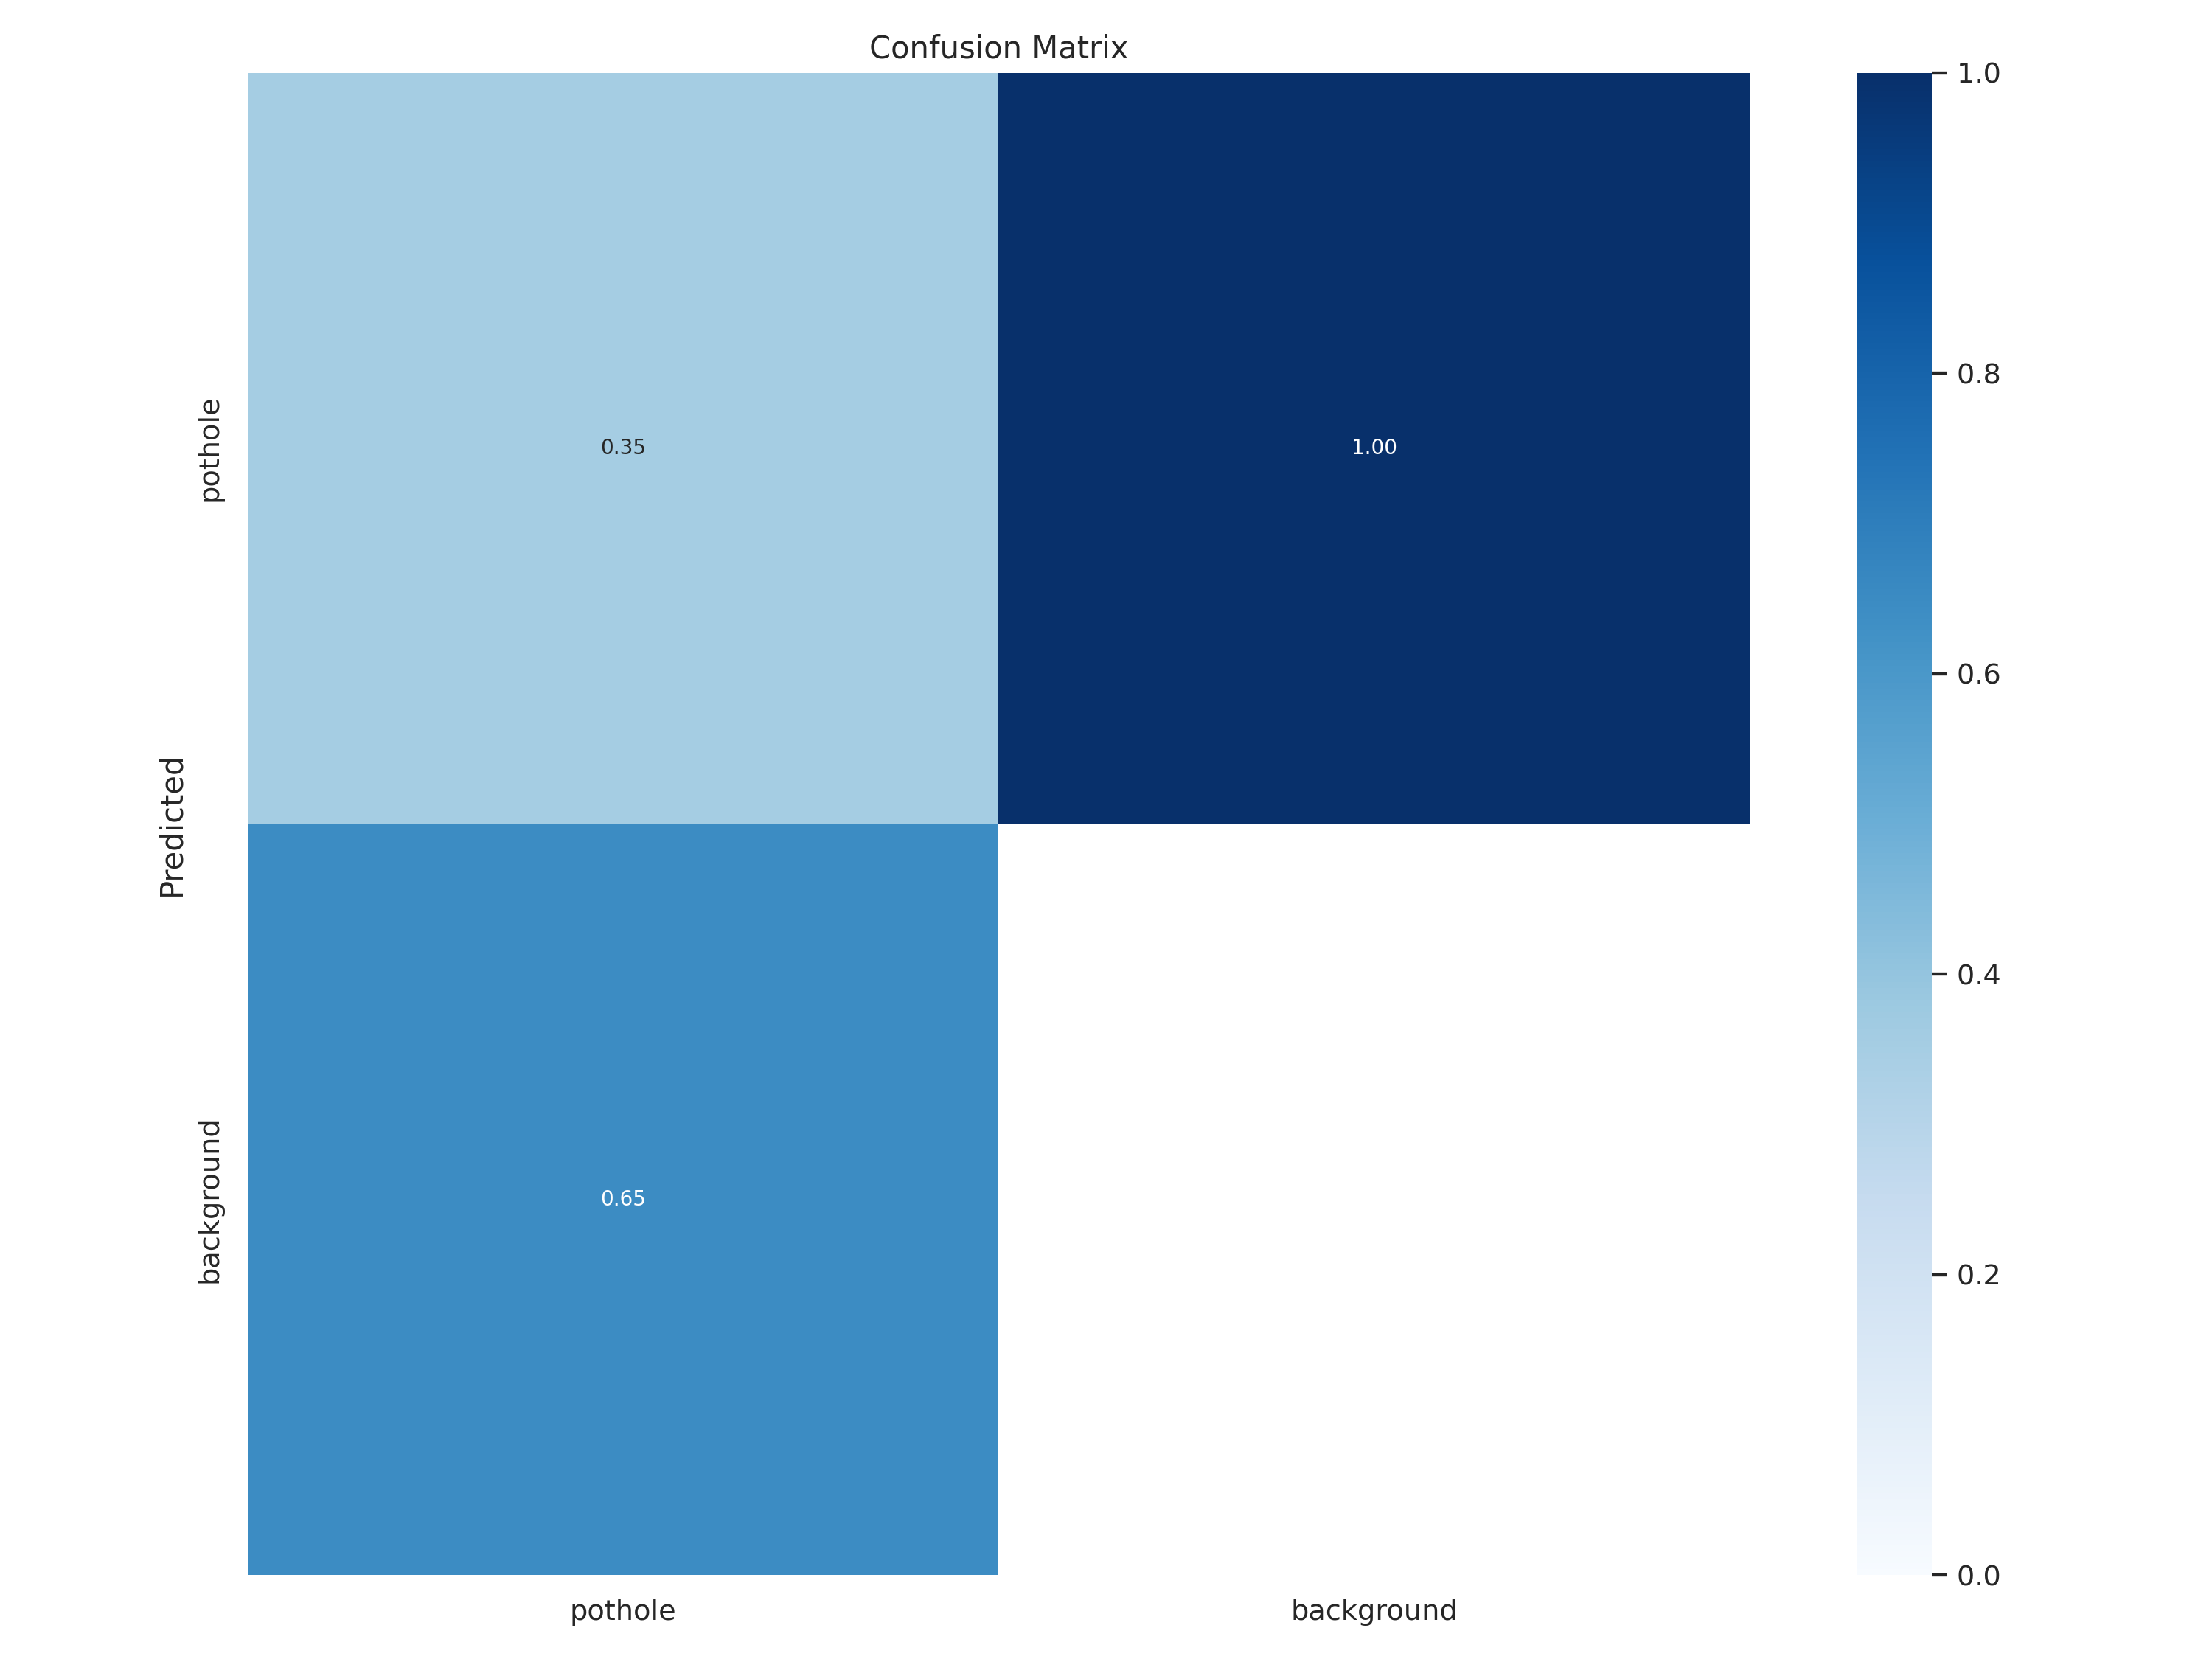

In [ ]:
Image(filename='/content/datasets/Potholes/runs/detect/train/confusion_matrix.png', width=900)

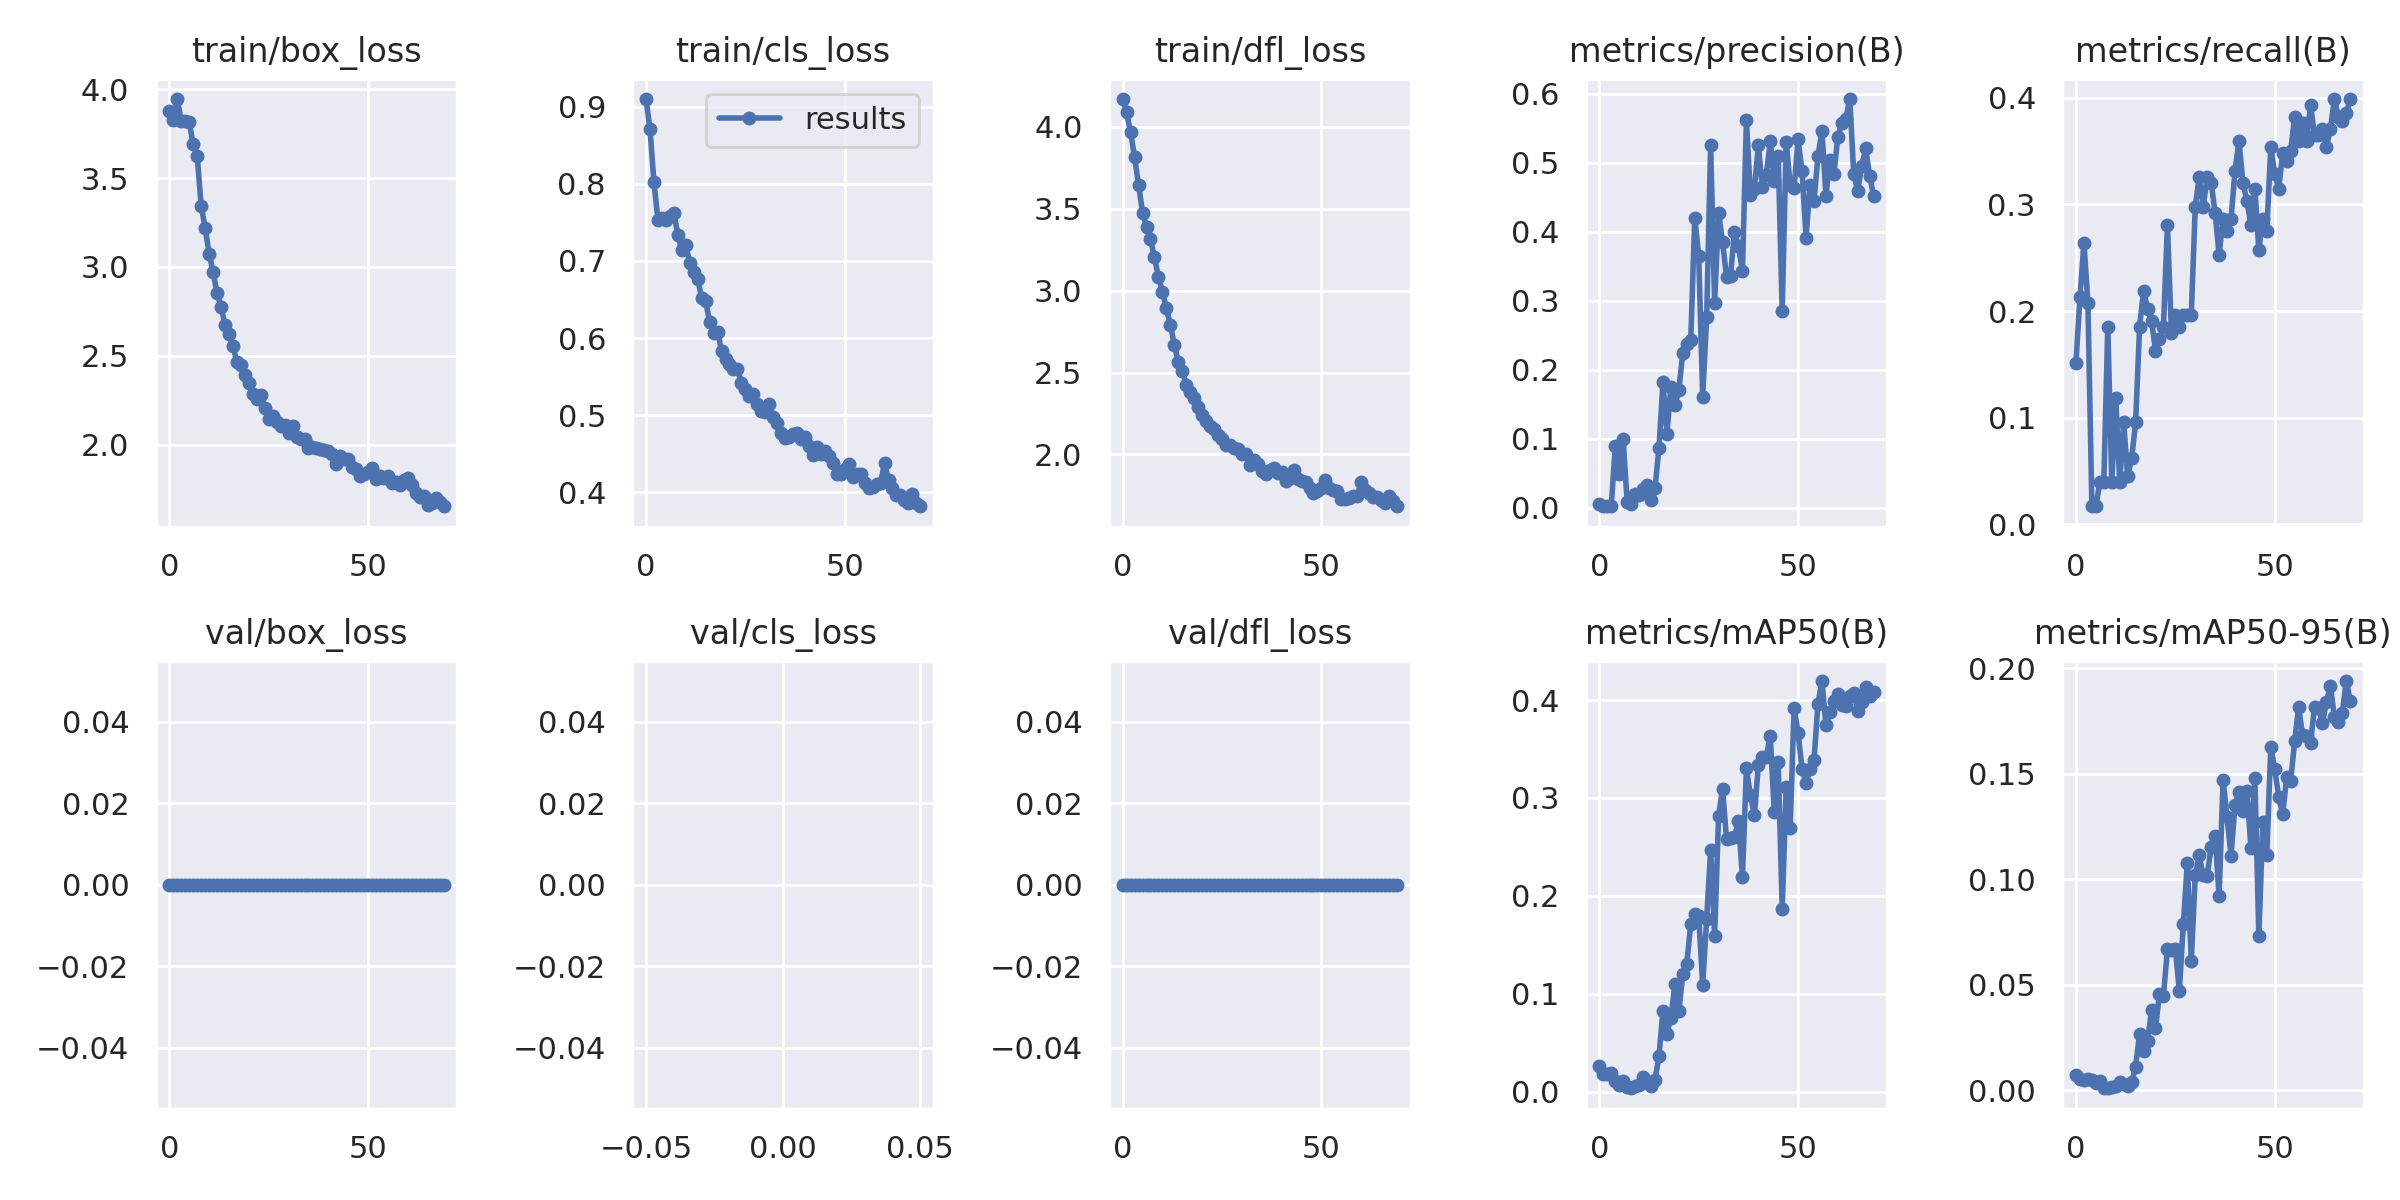

In [ ]:
Image(filename='/content/datasets/Potholes/runs/detect/train/results.png', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/datasets/Potholes/runs/detect/train/weights/best.pt data=/content/datasets/Potholes/data.yaml

2025-01-09 21:53:26.202662: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-09 21:53:26.222325: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-09 21:53:26.228245: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-09 21:53:26.242776: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-09 21:53:27.440581: W tensorflow/compiler/tf2

In [ ]:
# Testing the Model on Test Dataset images
%cd {HOME}
!yolo task=detect mode=predict model=/content/datasets/Potholes/runs/detect/train/weights/best.pt conf=0.25 source=/content/datasets/Potholes/test/images

/content
2025-01-09 22:06:03.022091: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-09 22:06:03.041939: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-09 22:06:03.047762: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-09 22:06:03.061742: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-09 22:06:04.279945: W tensorflow/com

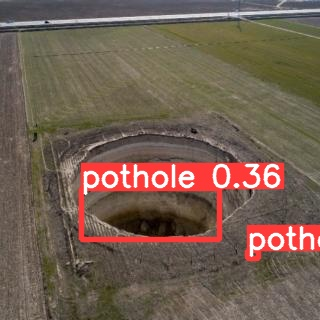

In [ ]:
Image(filename='/content/runs/detect/predict/23_jpg.rf.c1a66c00f0e10611557c9a0bf7ca7d42.jpg', width=600)

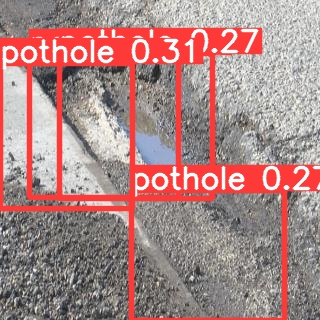

In [ ]:
Image(filename='/content/runs/detect/predict/233_jpg.rf.9334992927eb20fe7573f6accab84093.jpg', width=600)

### Testing on a Demo Video

In [ ]:
!yolo task=detect mode=predict model=/content/datasets/Potholes/runs/detect/train/weights/best.pt conf=0.25 source='/content/demo_holes.mp4'

2025-01-09 22:27:07.123341: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-09 22:27:07.142578: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-09 22:27:07.148571: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-09 22:27:07.162813: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-09 22:27:08.393668: W tensorflow/compiler/tf2

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict2/demo_holes.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)